In [45]:
import rasterio
from rasterio.plot import show
from skimage.filters import median
import skimage.filters.rank
import matplotlib.pyplot as plt
import numpy as np

In [63]:

# Caminho para a sua imagem georreferenciada
image_path = 'G:/Meu Drive/INPE\projeto_dissertacao/0_images/1_processed_images/1_OPTICAL/REC2_LT05_L2SP_227062_20100629_20200823_02_T1.TIF'
# Caminho para salvar a imagem filtrada
output_path = 'G:/Meu Drive/INPE/projeto_dissertacao/REC2_LT05_L2SP_227062_20100629_20200823_02_T1.TIF'

In [128]:
with rasterio.open(image_path) as src:
    image = src.read()  # Ler os dados da imagem como um array numpy
    affine = src.transform  # Guardar a transformação georreferenciada
    profile = src.profile  # Copiar o perfil da imagem original


In [32]:
from skimage.morphology import square

In [133]:
footprint = square(5)
footprint


array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [81]:
footprint2 = np.array([[-1,-1, -1],[-1,8,-1],[-1,-1,-1]])
footprint2

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [135]:
filtered_image = np.zeros_like(image)
for i in range(image.shape[0]):
    filtered_image[i, :, :] = skimage.filters.median(image[i, :, :], footprint)
   

In [127]:
image = image

<Axes: title={'center': 'Filtered Image'}>

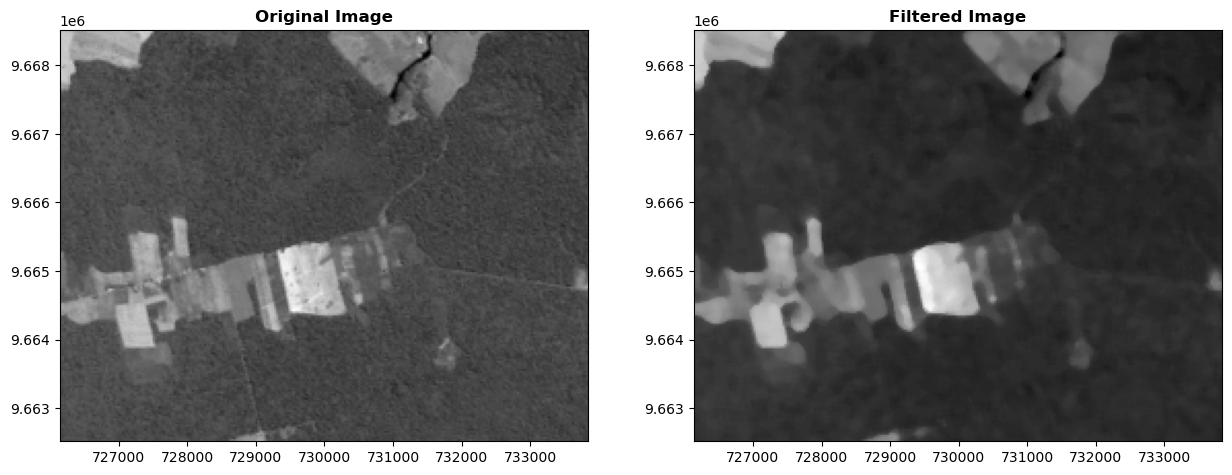

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
show(image[4,600:800,200:], transform=affine, cmap='gray', ax=ax[0], title="Original Image")
show(filtered_image[4,600:800,200:], transform=affine,cmap='gray', ax=ax[1], title="Filtered Image")


In [144]:
image_hp = image - filtered_image
#image_hp = image_hp*100 + 5000

image_hp

array([[[  150, 65384,    76, ...,     0,     0, 65460],
        [    0,     0, 65461, ..., 65386,   150,    76],
        [    1, 65461, 65310, ...,   226,    75, 65387],
        ...,
        [65460,   300,    75, ...,    75,    76,     0],
        [    0,    75, 65535, ...,   151,     0, 65535],
        [    0,     0,     0, ..., 65462, 65312,     0]],

       [[    0, 65382, 65382, ...,   154,     0,     0],
        [    0, 65382,     0, ...,   153,     0, 65382],
        [65381,     0,     0, ...,   308,   155, 65075],
        ...,
        [    0,     0,   153, ...,     1, 65383,     1],
        [    0,     0, 65381, ...,   154,     0, 65535],
        [  154,     0,     0, ...,     0,     0,     0]],

       [[    0, 65412,     0, ...,   373,   124,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [65412, 65535,   125, ...,   125,   125, 65163],
        ...,
        [    0, 65535,     0, ...,   123,     1,   123],
        [    0,     0,     0, ..., 65535, 655

<Axes: title={'center': 'Filtered Image'}>

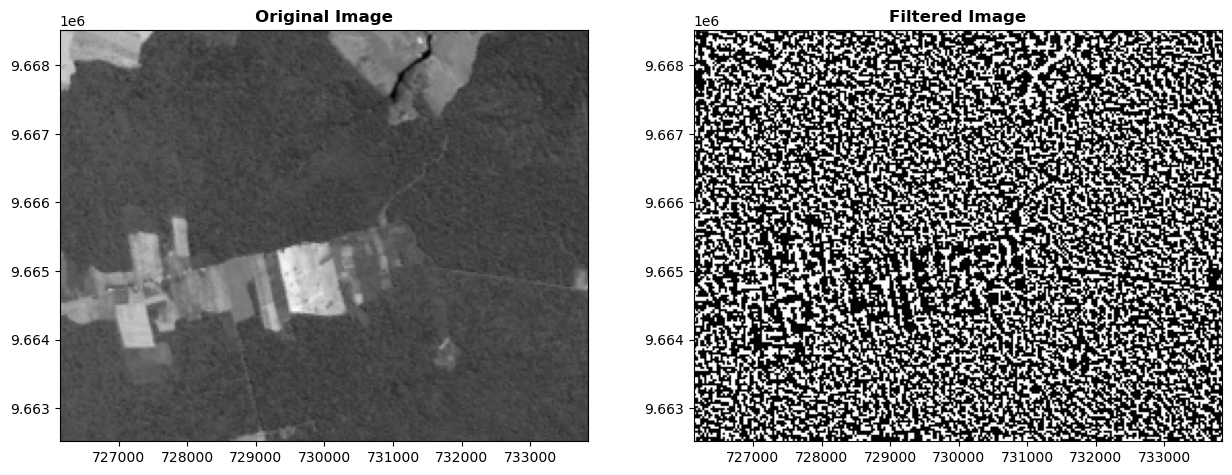

In [145]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
show(image[4,600:800,200:], transform=affine, cmap='gray', ax=ax[0], title="Original Image")
show(image_hp[4,600:800,200:], transform=affine,cmap='gray', ax=ax[1], title="Filtered Image")

In [146]:
image_enhanced = image + image_hp

<Axes: title={'center': 'Filtered Image'}>

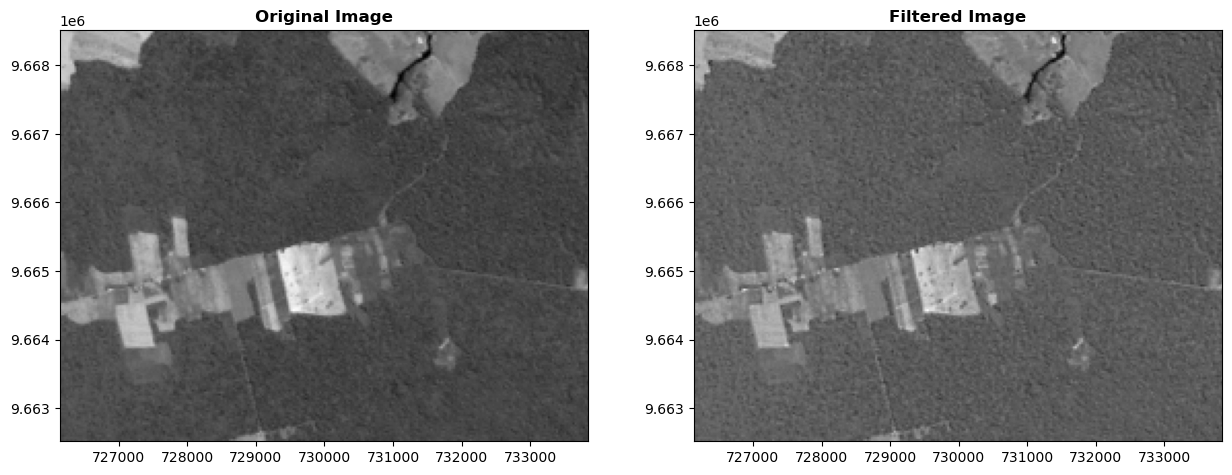

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
show(image[4,600:800,200:], transform=affine, cmap='gray', ax=ax[0], title="Original Image")
show(image_enhanced[600:800,200:], transform=affine,cmap='gray', ax=ax[1], title="Filtered Image")

In [150]:
output_path = 'G:/Meu Drive/INPE/projeto_dissertacao/REC2_LT05_L2SP_227062_20100629_20200823_02_T13.TIF'

In [151]:
profile.update(dtype=rasterio.int16)
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(image_hp)

In [57]:
red = image[3-1].ravel()
nir = image[4-1].ravel()

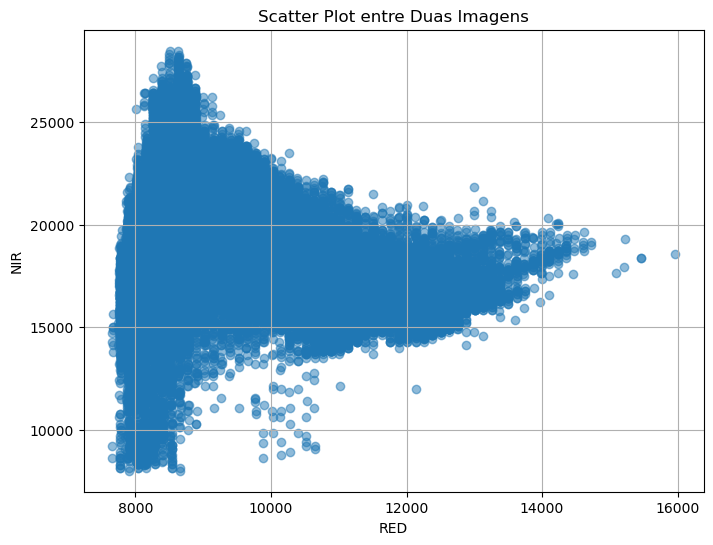

In [62]:
# Criar o scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(red, nir, alpha=0.5)
plt.title('Scatter Plot entre Duas Imagens')
plt.xlabel('RED')
plt.ylabel('NIR')
plt.grid(True)
plt.show()